<h3><center> EDA - Exploratory Data Analysis </center></h3>
EDA helps us to analyse the data by visulazing the graphs and plots. It tells the relationship between features of any dataset. As compared to looking at the whole data, visualizing is easy. So, we will do this on a givem dataset.

In [1]:
# importing all the libraries

import warnings
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore')

In [2]:
# read excel data

data = pd.read_excel('data.xlsx')

**Introduction about Dataset -** This dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines.<br><br> The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills.<br><br> The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.<br><br> We will analyse the data by plotting different different graphs 😊.

**Info about Data -** Firstly we will see what our data contains, what is the size of the data and is there any missing value or not. What our data describes and many more things using pandas library which makes this work very easy 😎😎😎.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head() # We can see top 5 rows of dataset using head function.

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
data.shape # It tells us the size of the data. In this data we have 3998 rows and 39 features as indexing starts from 0.

(3998, 39)

In [6]:
data.describe() # Using describe function we can find the statistical values of all numerical values of a dataset.

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [7]:
data.describe(include='all') # It will include categorical values as well.

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998,3.998000e+03,3.998000e+03,3998,3998,3998,3998,3998,3998,3998.000000,3998,3998.000000,3998.000000,3998,3998.000000,3998.000000,3998,3998,3998.000000,3998.000000,3998.000000,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
unique,1,NaN,NaN,81,67,419,339,2,1872,NaN,275,NaN,NaN,340,NaN,NaN,4,46,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,NaN,NaN,2014-07-01 00:00:00,present,software engineer,Bangalore,m,1991-01-01 00:00:00,NaN,cbse,NaN,NaN,cbse,NaN,NaN,B.Tech/B.E.,electronics and communication engineering,NaN,NaN,NaN,Uttar Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3998,NaN,NaN,199,1875,539,627,3041,11,NaN,1395,NaN,NaN,1400,NaN,NaN,3700,880,NaN,NaN,NaN,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1991-06-01 00:00:00,NaN,NaN,NaN,NaN,1977-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,1997-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.637945e+05,3.076998e+05,NaN,NaN,NaN,NaN,NaN,NaN,77.925443,NaN,2008.087544,74.466366,NaN,5156.851426,1.925713,NaN,NaN,71.486171,5156.851426,0.300400,NaN,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,NaN,3.632182e+05,2.127375e+05,NaN,NaN,NaN,NaN,NaN,NaN,9.850162,NaN,1.653599,10.999933,NaN,4802.261482,0.262270,NaN,NaN,8.167338,4802.261482,0.458489,NaN,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,NaN,1.124400e+04,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,NaN,1995.000000,40.000000,NaN,2.000000,1.000000,NaN,NaN,6.450000,2.000000,0.000000,NaN,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,NaN,3.342842e+05,1.800000e+05,NaN,NaN,NaN,NaN,NaN,NaN,71.680000,NaN,2007.000000,66.000000,NaN,494.000000,2.000000,NaN,NaN,66.407500,494.000000,0.000000,NaN,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200


In [8]:
data.info() # We can see the type and features of a dataset using info.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [9]:
data.isnull().sum() # To check null values in dataset.

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

**We don't have any missing value in dataset so we can easily plot the graphs.**

In [10]:
data.Degree.value_counts() # It will count the values of a categorical column.

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [11]:
data.groupby('Degree')['Salary'].sum() # Using group by function we can group the data by any column.

Degree
B.Tech/B.E.      1141904000
M.Sc. (Tech.)        640000
M.Tech./M.E.       19405000
MCA                68235000
Name: Salary, dtype: int64

In [12]:
new_df = data.groupby('Degree')

In [13]:
new_df1 = data.groupby('12board')

In [14]:
new_df['Specialization'].sum()

Degree
B.Tech/B.E.      computer engineeringelectronics and communicat...
M.Sc. (Tech.)                  information sciencecomputer science
M.Tech./M.E.     computer science & engineeringelectrical engin...
MCA              computer applicationcomputer applicationcomput...
Name: Specialization, dtype: object

In [15]:
new_df1['12percentage'].sum()

12board
0                                                               26816.43
 board of intermediate                                            185.20
 upboard                                                           62.40
ahsec                                                              57.80
aissce                                                             66.20
                                                                  ...   
west bengal board of higher secondary education                    63.50
west bengal council of higher secondary education                 355.19
west bengal council of higher secondary eucation                   81.00
west bengal council of higher secondary examination (wbchse)       75.00
west bengal state council of technical education                   78.00
Name: 12percentage, Length: 340, dtype: float64

<h2> Univariate analysis - </h2> Univariate means - single variable. We will plot the graphs for single variable. We have many graphs in it. Let's see - 

Mean  307699.8499249625
Median  300000.0
Minimum value  35000
Maximum value  4000000


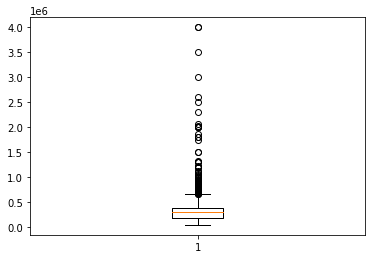

In [16]:
# Let's visualize the Salary column - 

print("Mean ", data['Salary'].mean())
print("Median ", data['Salary'].median())
print("Minimum value ", data['Salary'].min())
print("Maximum value ", data['Salary'].max())

plt.boxplot(data['Salary'])
plt.show()

**In salary, we can see we have many values which are extremely high. These are called outliers. Boxplot helps to identify the outliers. And it also tells the mean, median, IQR.**

<AxesSubplot:xlabel='Salary', ylabel='Density'>

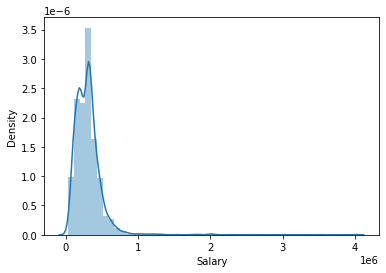

In [17]:
# We can see the distribution plot as well of Salary -

sns.distplot(data['Salary'])

Mean  77.9254427213607
Median  79.15
Minimum value  43.0
Maximum value  97.76


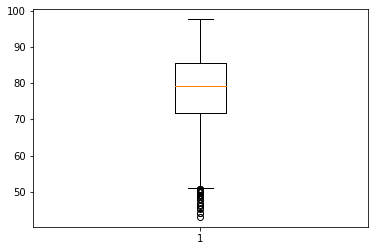

In [18]:
# 10 percentage

print("Mean ", data['10percentage'].mean())
print("Median ", data['10percentage'].median())
print("Minimum value ", data['10percentage'].min())
print("Maximum value ", data['10percentage'].max())

plt.boxplot(data['10percentage'])
plt.show()

**In 10 percentage, we have some values which are extremely low.**

<AxesSubplot:xlabel='10percentage', ylabel='Density'>

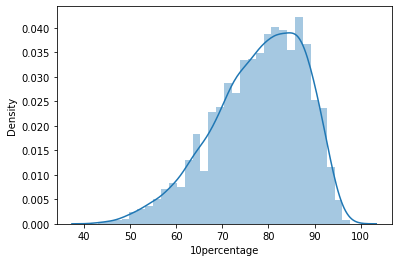

In [19]:
sns.distplot(data['10percentage'])

**The distribution looks like left-skewed because we saw we have some outliers (extremely low values) in this column.**

Mean  74.46636568284141
Median  74.4
Minimum value  40.0
Maximum value  98.7


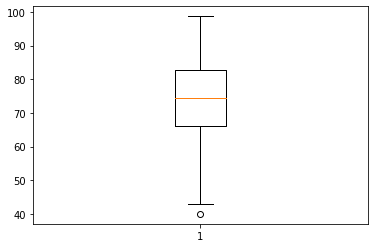

In [20]:
# 12 percentage

print("Mean ", data['12percentage'].mean())
print("Median ", data['12percentage'].median())
print("Minimum value ", data['12percentage'].min())
print("Maximum value ", data['12percentage'].max())

plt.boxplot(data['12percentage'])
plt.show()

**In 12 percentage, we have only one single value which is extremely low.**

<AxesSubplot:xlabel='12percentage', ylabel='Density'>

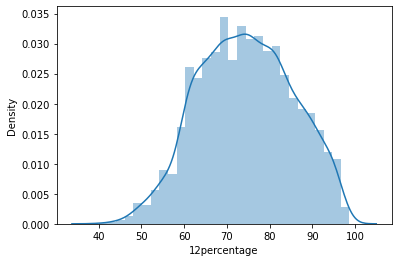

In [21]:
# Distribution plot of 12 percentage

sns.distplot(data['12percentage'])

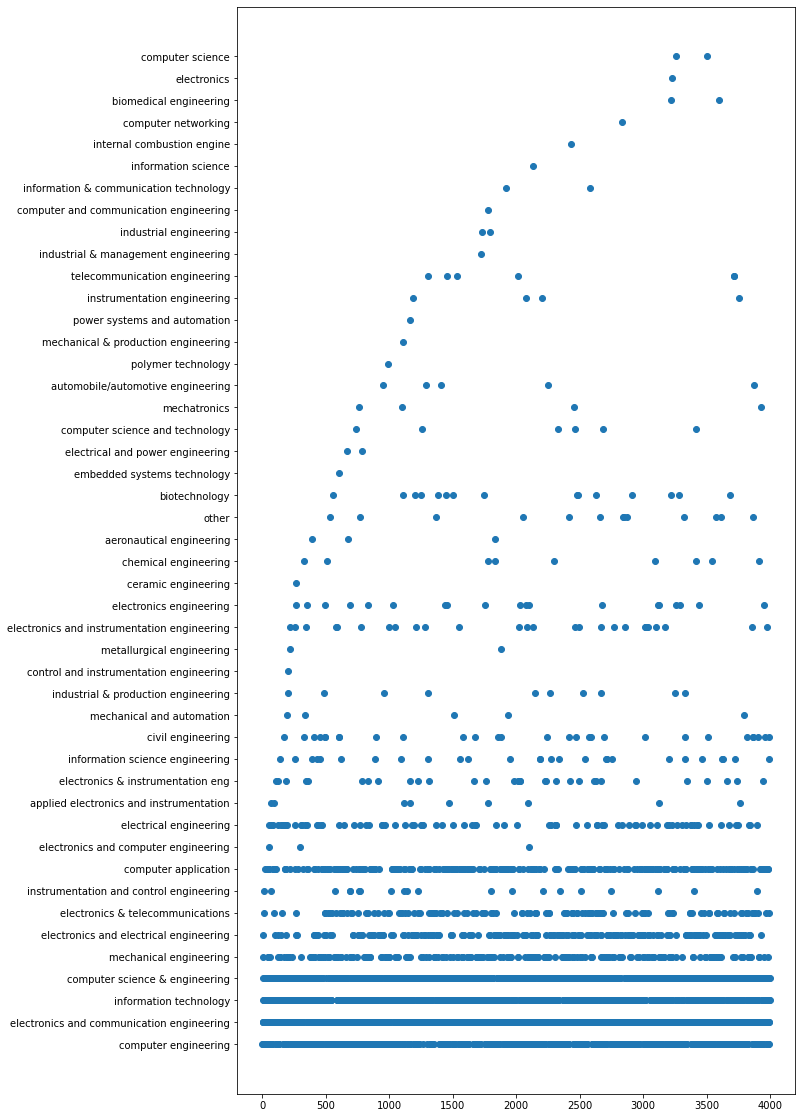

In [22]:
# Scatter plot of Specialization column -

plt.figure(figsize=(10,20))
plt.scatter(data.index, data['Specialization'])

**We can see what specialization values we have in dataset and highly asked courses are computer engineering, electronics and communication engineering, information technology, computer science & engineering.**

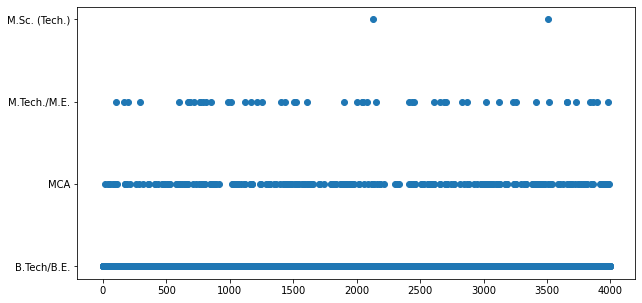

In [23]:
# Scatter plot of Degree column - 

plt.figure(figsize=(10,5))
plt.scatter(data.index, data['Degree'])

**Mostly students choose B.tech/B.E. as their degree.**

<AxesSubplot:ylabel='Specialization'>

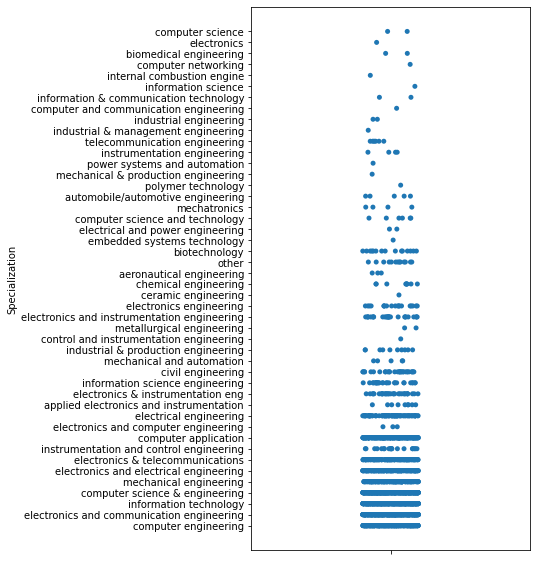

In [24]:
# This is same as Scatter plot that we already plotted for Specialization -

plt.figure(figsize=(5,10))
sns.stripplot(y=data['Specialization'])

(array([   7.,    5.,    7.,   11.,   40.,  127.,  439., 1389., 1536.,
         437.]),
 array([-7.3757 , -6.45589, -5.53608, -4.61627, -3.69646, -2.77665,
        -1.85684, -0.93703, -0.01722,  0.90259,  1.8224 ]),
 <BarContainer object of 10 artists>)

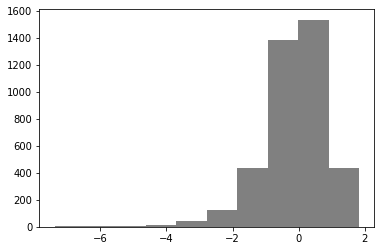

In [25]:
# Histogram plot for openess_to_experience column - 

plt.hist(data['openess_to_experience'], color='grey')

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

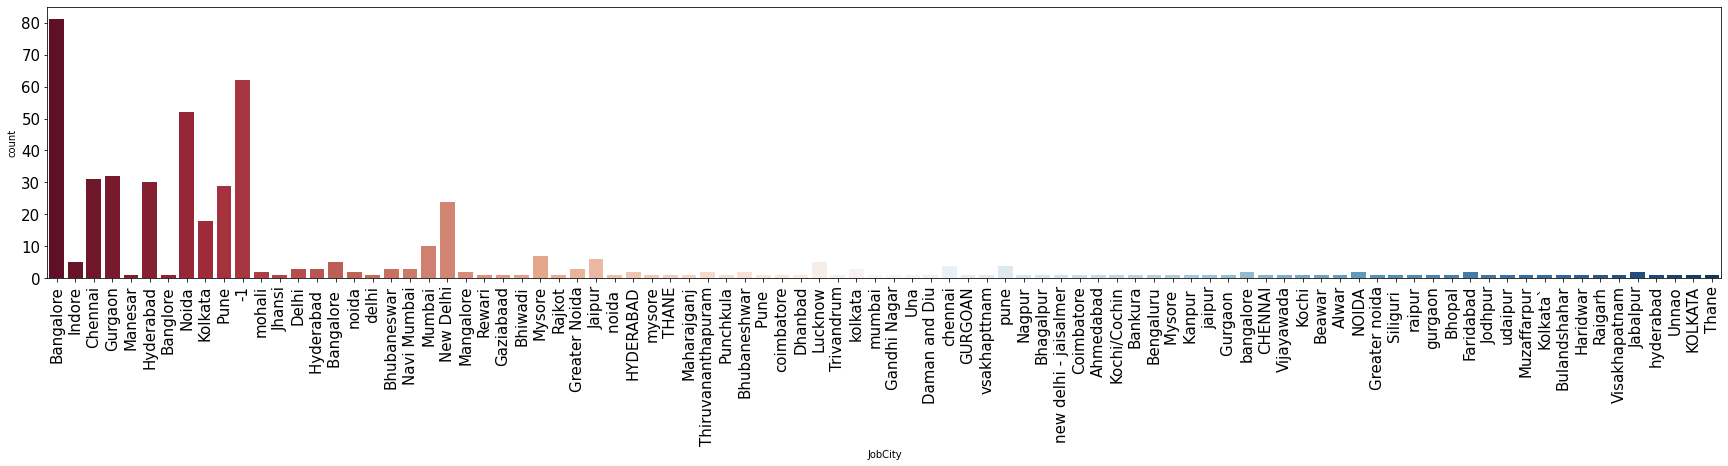

In [26]:
plt.figure(figsize=(30, 5))
sns.countplot(x='JobCity', data=data[:500], palette='RdBu')
plt.xticks(fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)

**The highest jobs are available in Banglore.**

<h2> Bivariate analysis - </h2> Bivariate means - Two variables. We will plot the graphs for two variables. We have many graphs in it. Let's see - 

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

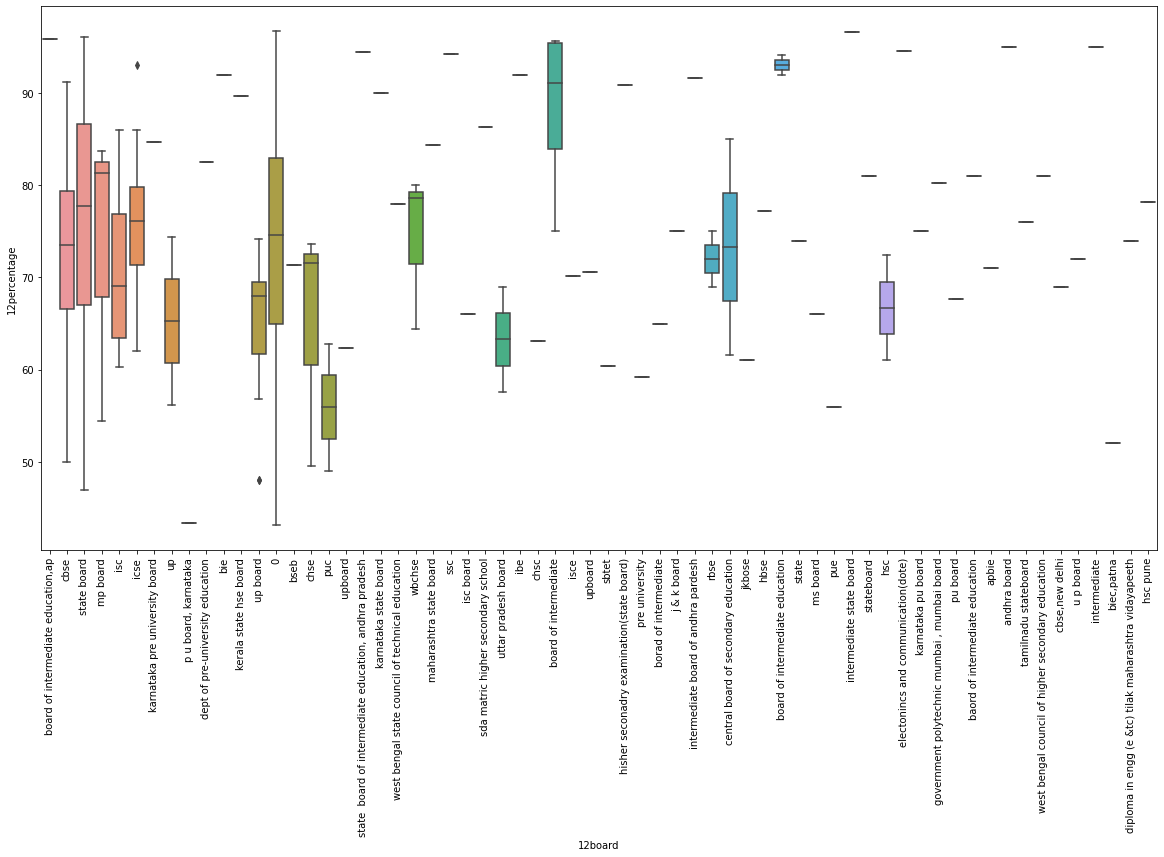

In [27]:
# Boxplot for two variables - One numerical, One categorical - 

plt.figure(figsize=(20,10))
sns.boxplot(data = data[:500], x='12board', y='12percentage')
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

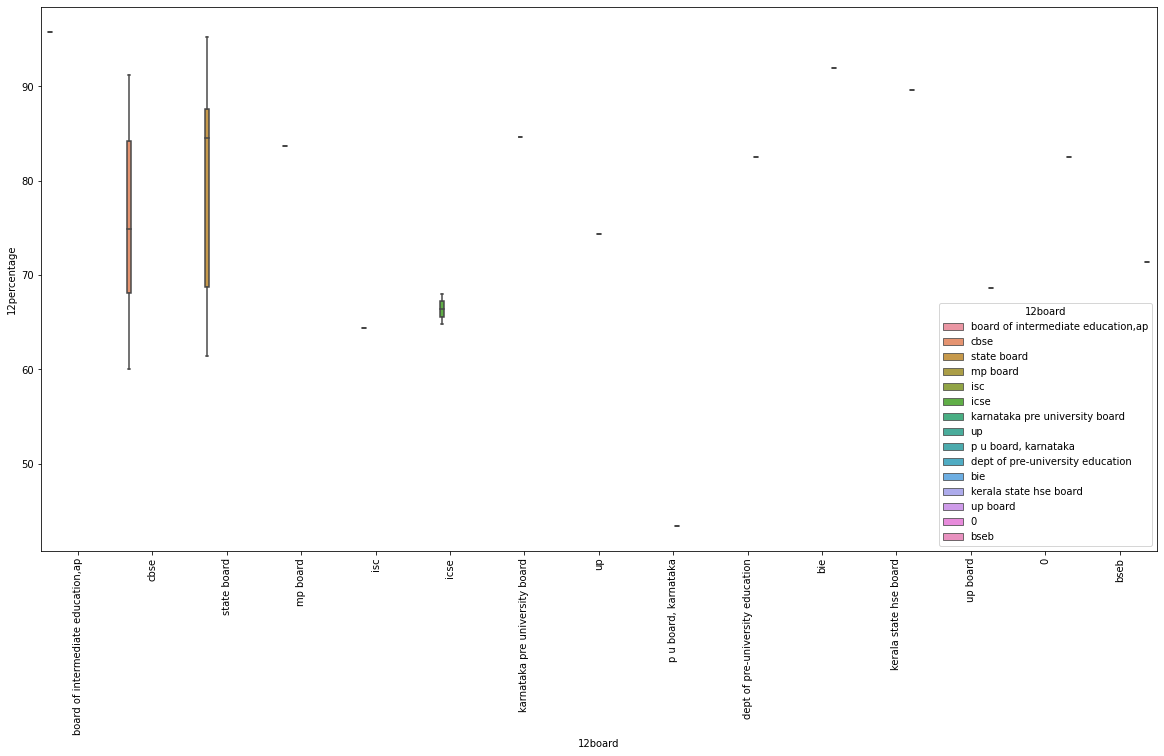

In [28]:
# Boxplot on 12 board and 12 percenatge with hue 12 board - 

plt.figure(figsize=(20,10))
sns.boxplot(data = data[:50], x='12board', y='12percentage', hue='12board')
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)

(array([ 50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

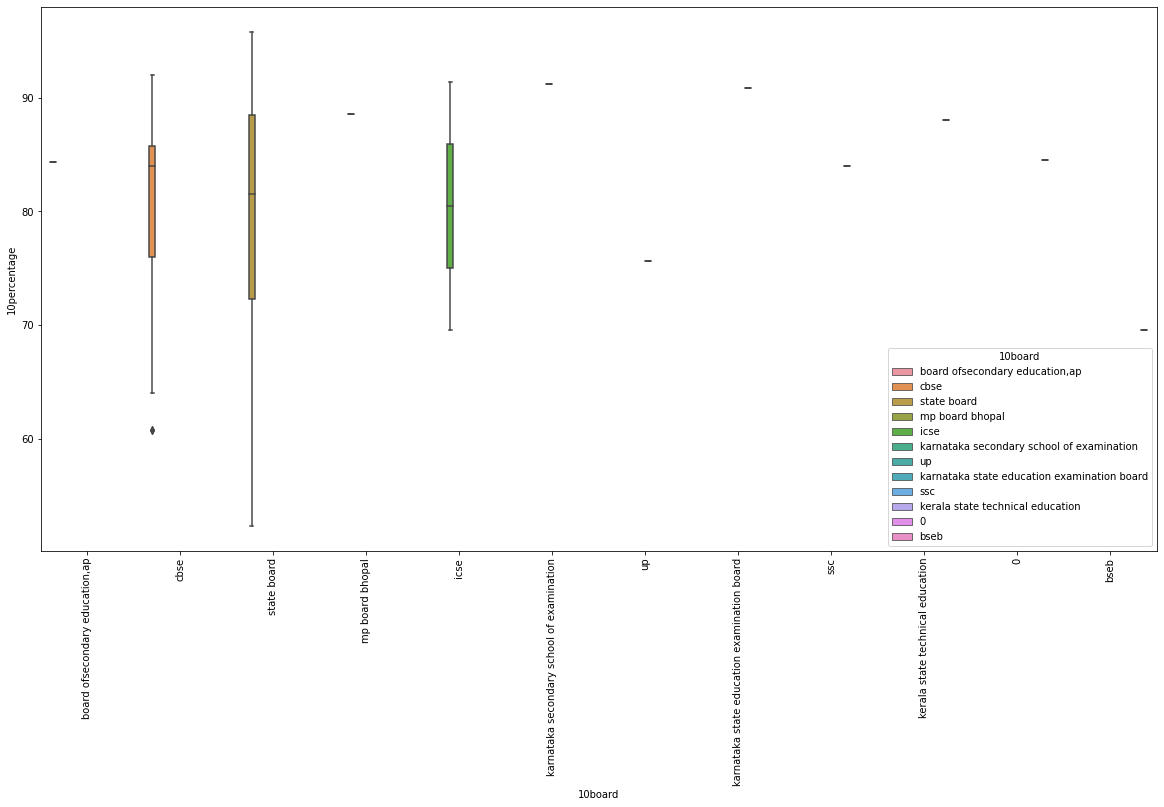

In [29]:
# 10 percentage - 

plt.figure(figsize=(20,10))
sns.boxplot(data = data[:50], x='10board', y='10percentage', hue='10board')
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

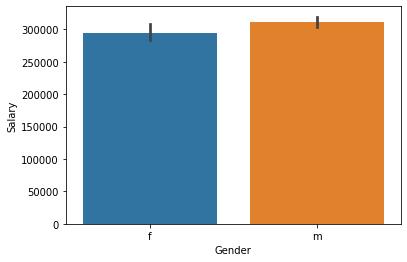

In [30]:
sns.barplot(x='Gender', y='Salary', data=data)

**After barplot of Gender and Salary we can see that males are getting highest salary.**

Text(0, 0.5, 'Salary')

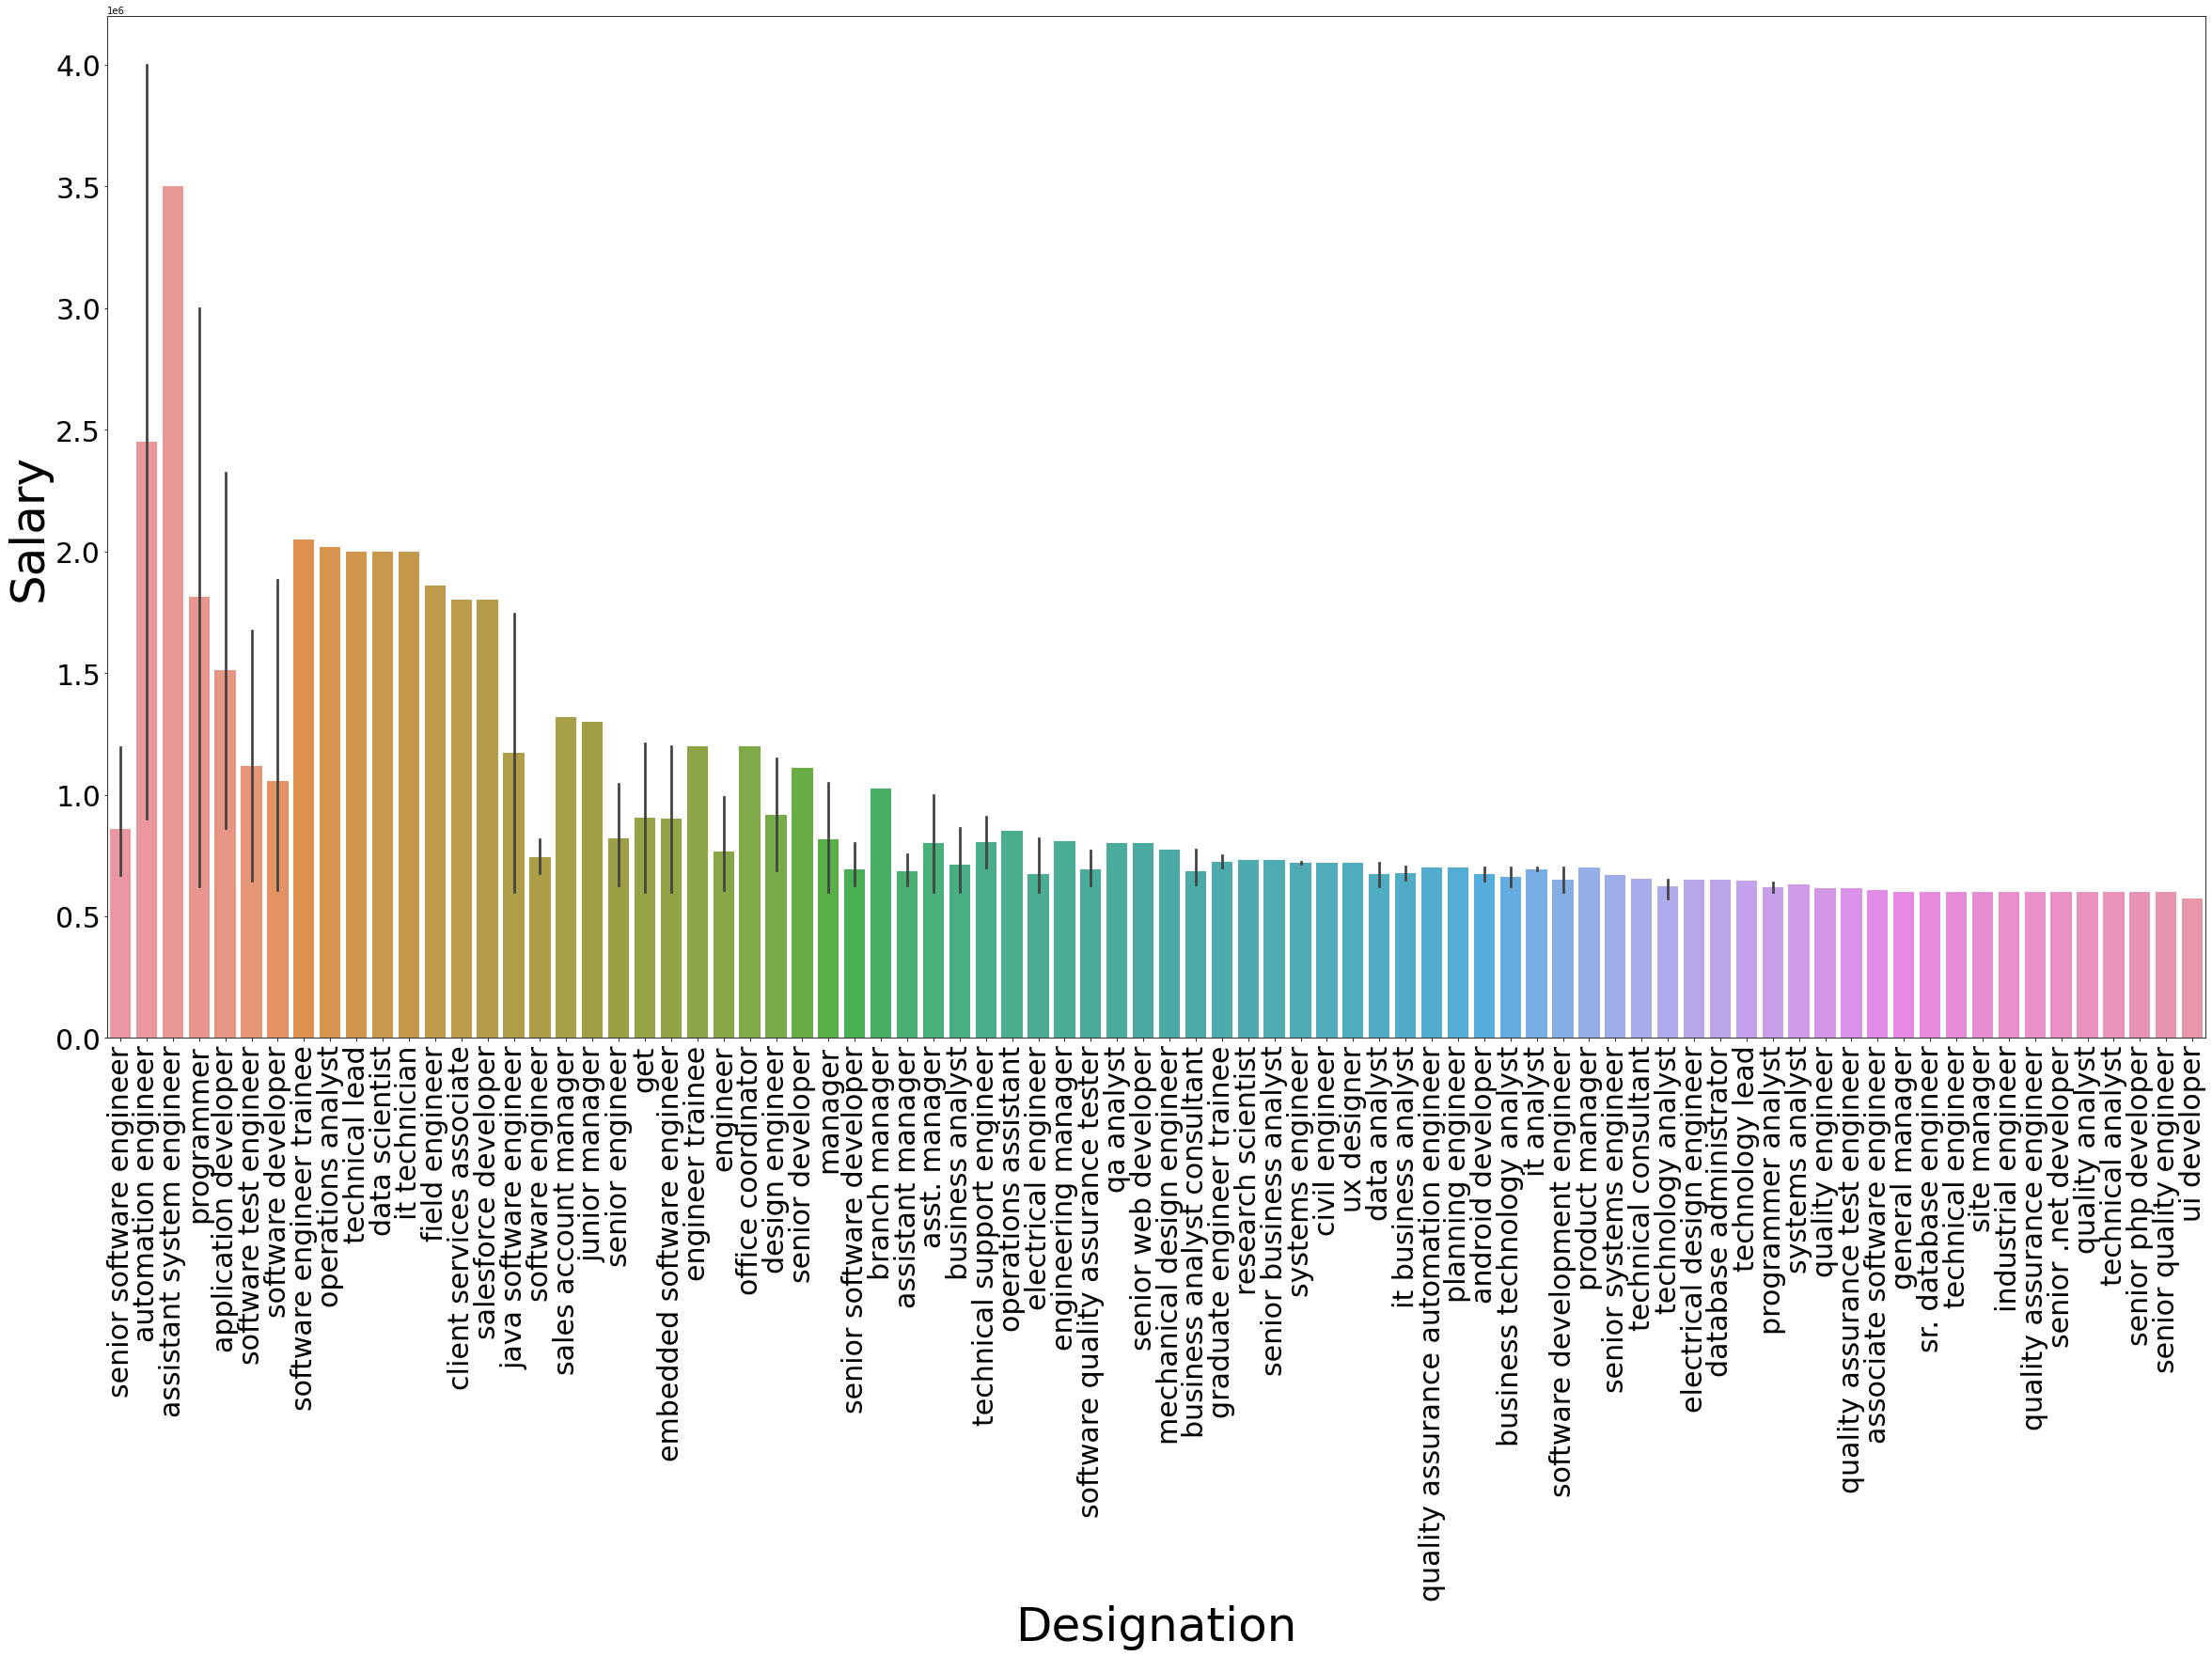

In [31]:
# Designation by Salary - 

plt.figure(figsize=(40, 20))
data1 = data.sort_values(by=['Salary'], ascending=False)
sns.barplot(x='Designation', y='Salary', data=data1[:200])
plt.xticks(fontsize=30)
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
plt.xlabel('Designation', fontsize= 50)
plt.ylabel('Salary', fontsize = 50)

**The people who are at the post of *assistant system engineer* are getting high salary**

<AxesSubplot:xlabel='Degree', ylabel='Salary'>

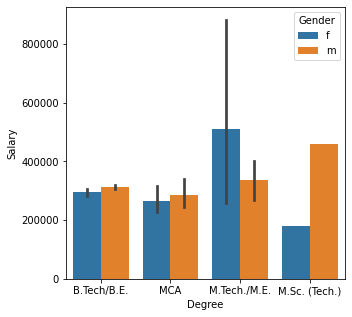

In [32]:
plt.figure(figsize=(5,5))
sns.barplot(x='Degree', y='Salary', data=data, hue='Gender')

**The salary of females are high who did M.Tech/M.E.**

<AxesSubplot:xlabel='Degree', ylabel='collegeGPA'>

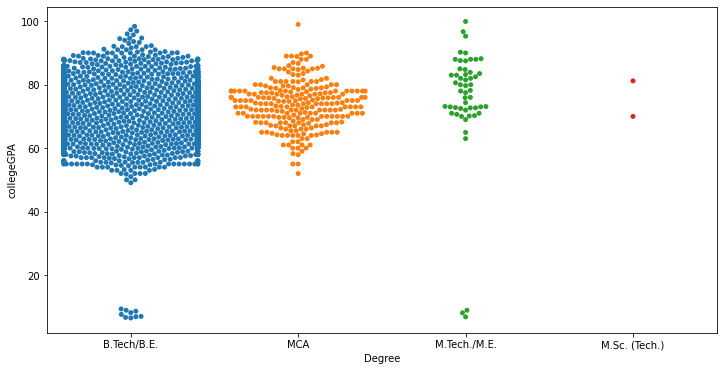

In [33]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Degree',y='collegeGPA',data=data)

**This shows the collegeGPA of students of different Degrees. And swarmplot spread the data so we can easily visualize.**

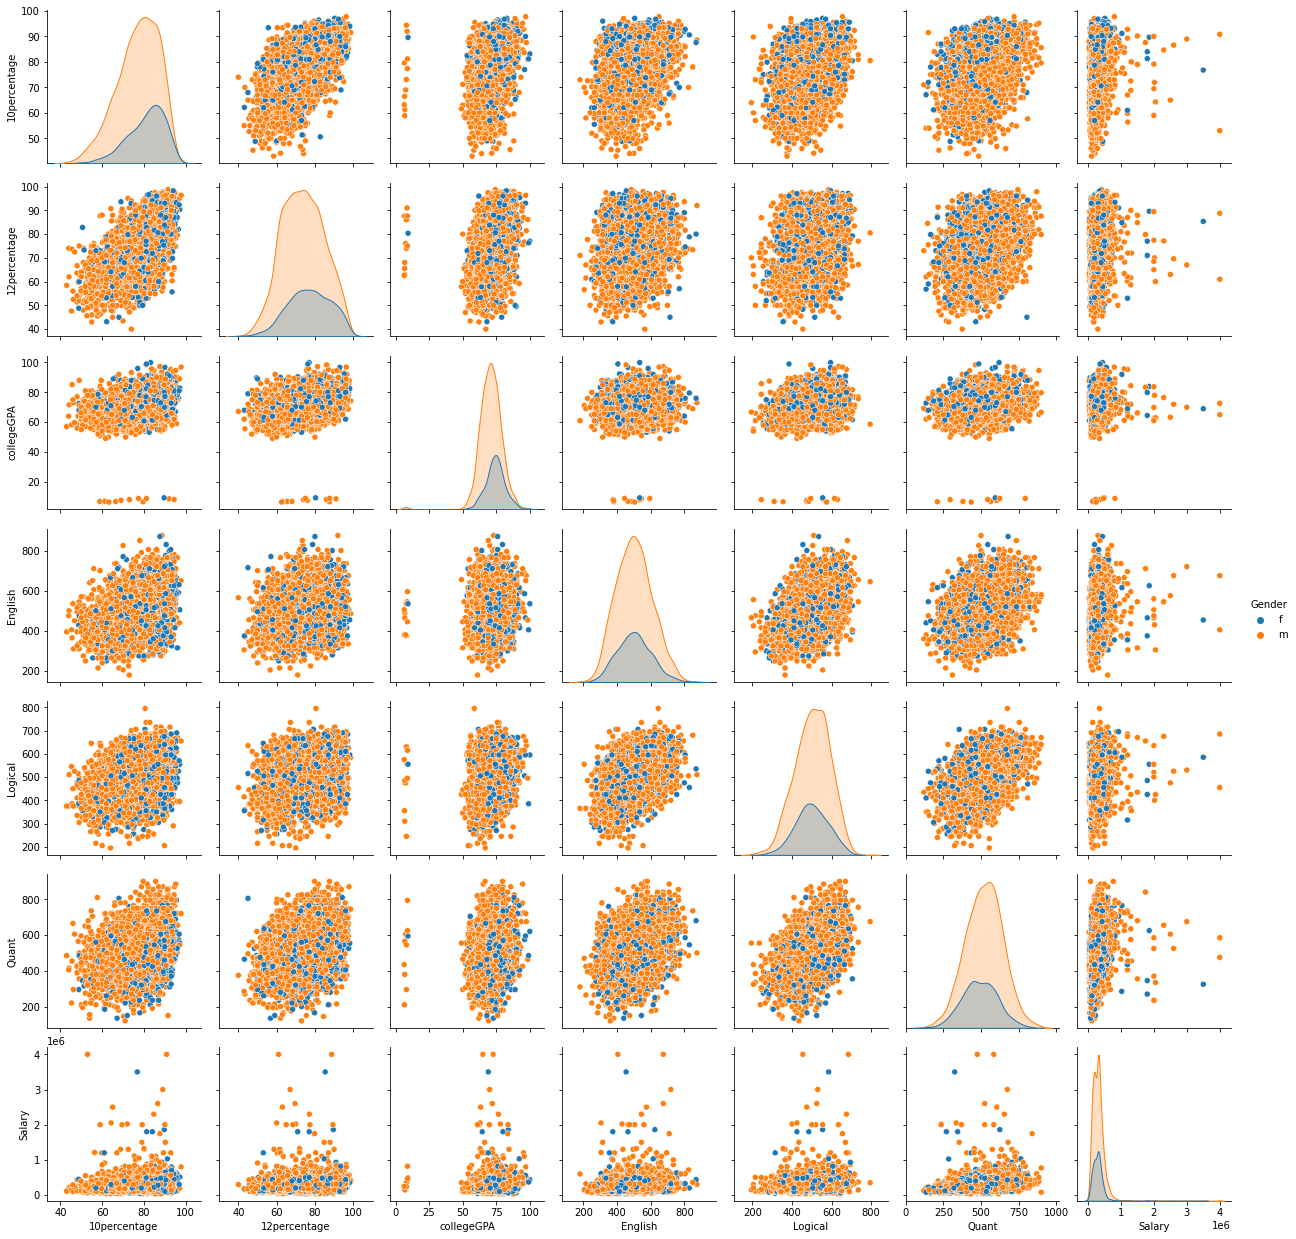

In [34]:
data1 = data[['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Gender', 'Salary']]
sns.pairplot(data1, hue='Gender')

**This is the pair plot between many features of dataset by gender.**

## Research Question - 
**Times of india dated Jan 18, 2019 states that "After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, software Engineer, Hardware engineer and Associate Engineer you can earn upto 2.5 - 3 Lakhs as a fresher graduate." Test this claim with the given data.**

We will verify this using hypothesis testing.
so, in this case - 

**Step1 -** Alternative hypothesis - $$ H_1: < \ 3 $$ 
> Null hypothesis - $$ H_0: >= \ 3 $$ 

**Step2 -** Collect sample of size 50 and then compute mean

**Step3 -** Compute test statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

**Step4 -** Decide $ \alpha $

**Step5 -** Reject or accept based on Tailed test or P value

In [35]:
# z_score for sampling distributions

def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [36]:
data['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [37]:
data1 = data[(data['Designation']=='programmer analyst') | (data['Designation']=='software engineer') |
            (data['Designation']=='associate software engineer') | (data['Designation']=='electrical engineer')]
data2 = data1[['Salary']]

In [38]:
data2.shape[0]

747

In [39]:
samples = random.sample(range(0, data2.shape[0]), 100)
sample_mean = data2.iloc[samples, 0].mean()
print(sample_mean)

359600.0


In [40]:
std = data['Salary'].std()
print(std)

212737.49995685622


In [41]:
# Left Tail - Calculating the z-critical value

confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha) # Left tailed Z score for 95% Confidence Level

print(z_critical)

1.6448536269514722


In [42]:
# Defining the sample and population parameters

sample_size = 100
sample_mean = sample_mean
pop_mean = data2['Salary'].mean()
pop_std = std
print(pop_mean)

337289.156626506


In [43]:
# Calculating the z-score

z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

1.0487499090672163


Text(359600.0, 0.0007, 'x_bar')

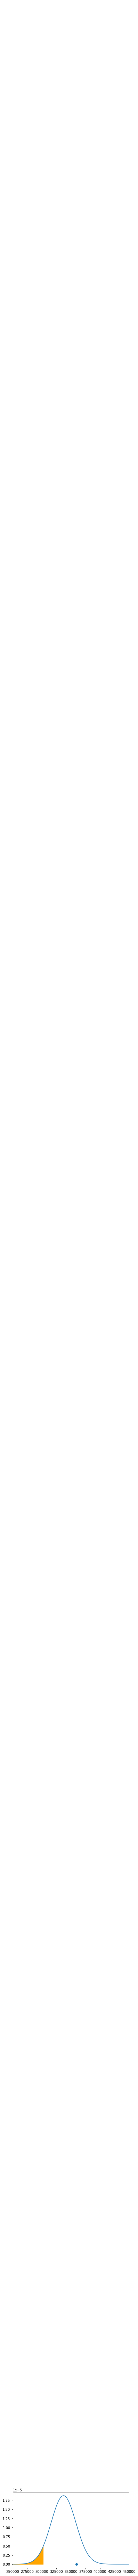

In [44]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 250000
x_max = 450000


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left critical value (left tailed Test)
z_critical_left = pop_mean - (z_critical * std)


# Shading the left rejection region
x2 = np.linspace(x_min, z_critical_left, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [45]:
# Conclusion using z test

if(np.abs(z) > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [46]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.29429323713166067
Fail to reject Null Hypothesis


***Conclusion -*** After hypothesis testing we can see that people who are at the post of programmer analyst or software engineer or associate software engineer or electrical engineer are getting salary around 350000. 

**Ques - is there a relationship between Gender and specialization ?**

In [47]:
data.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [48]:
data.Specialization.value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

Text(0.5, 0, 'Specialization')

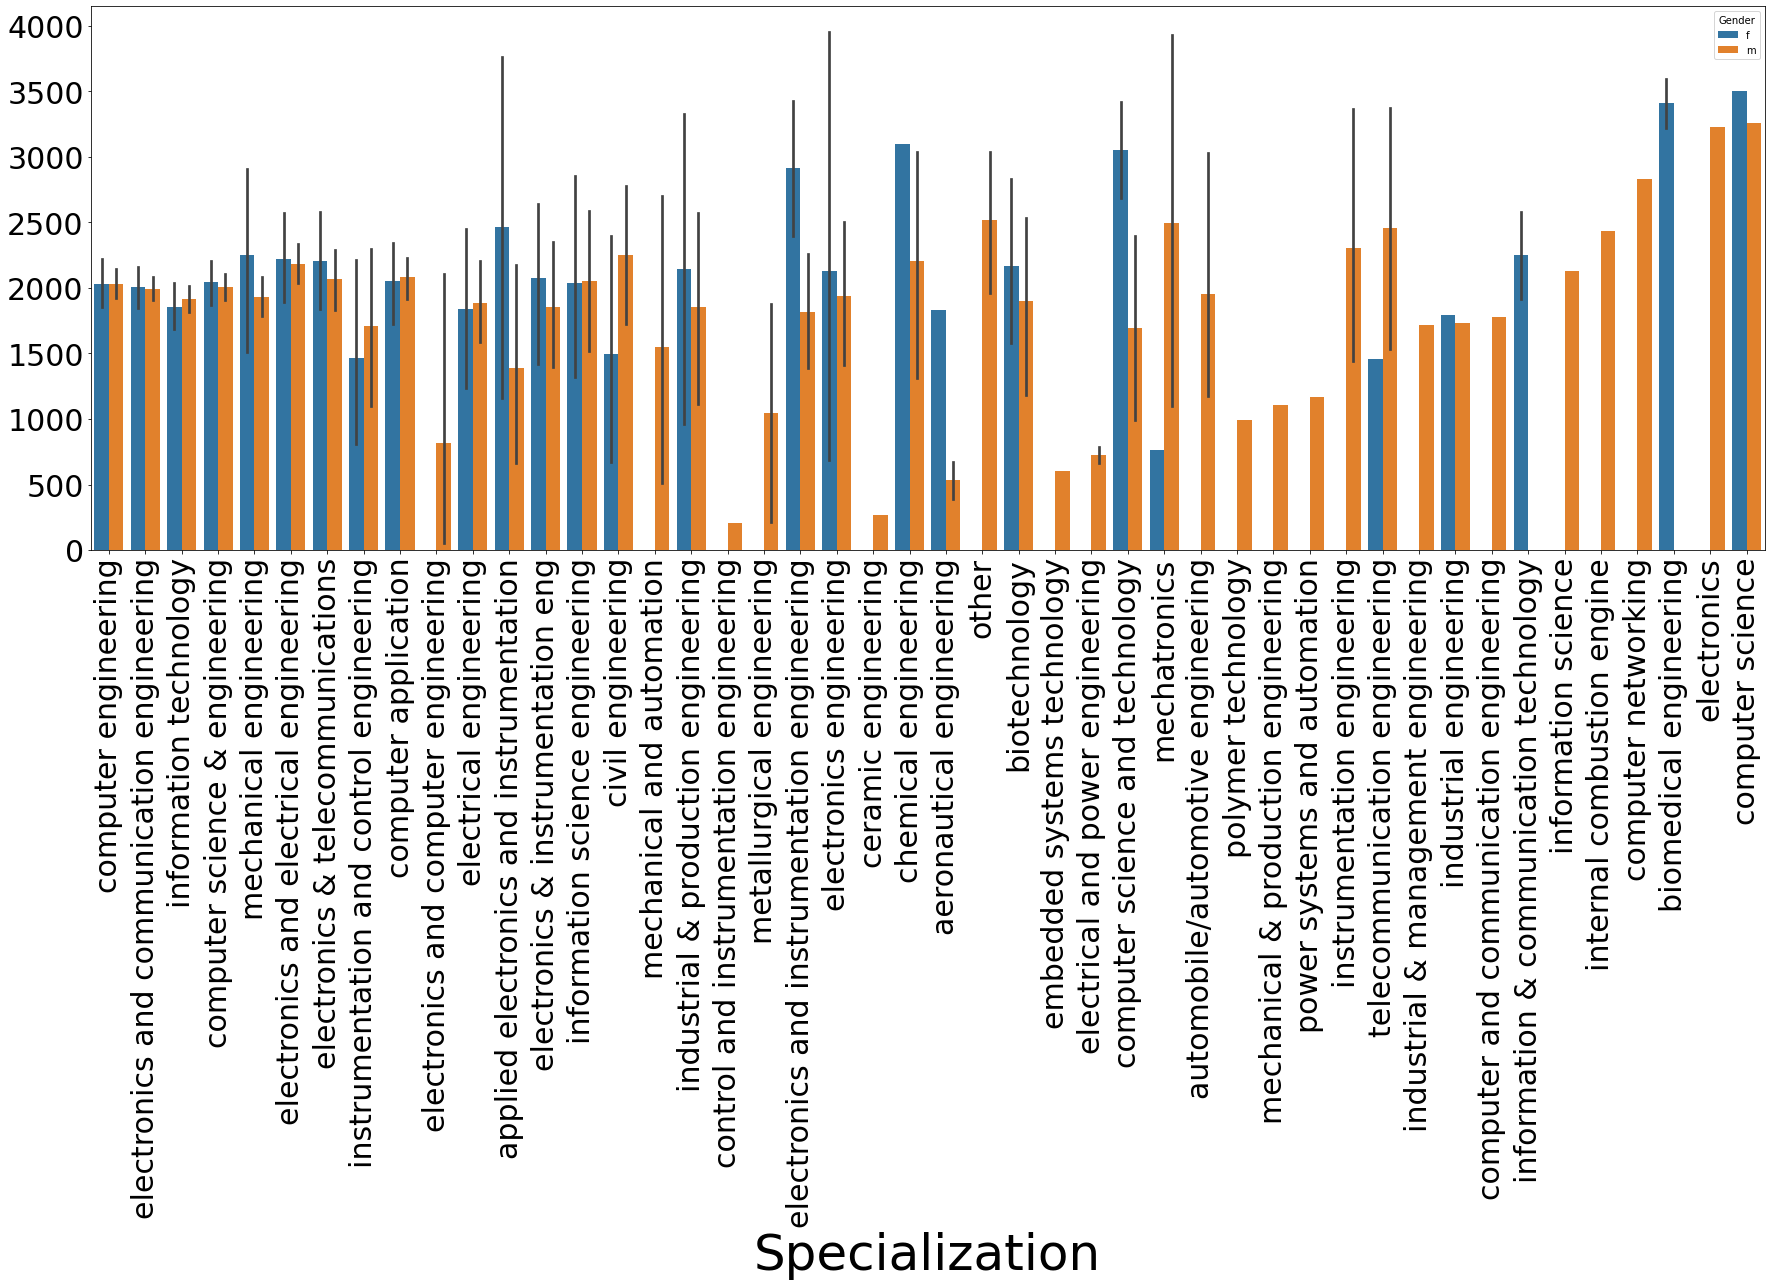

In [49]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Specialization', y=data.index, data=data, hue='Gender')
plt.xticks(fontsize=30)
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
plt.xlabel('Specialization', fontsize= 50)

***Conclusion -*** **We can see that preference of specialization depend on the gender.** <br>
Let's try to test this with chi-square test - 

**Understanding the Chi2 Test -**

Lets make a bold Claim that **Gender** and **Specialization** are dependent.

**Step1 -** Alternate Hypothesis: $$ H_1: They \ are \ Dependent $$
> Null Hypothesis: $$ H_0: They \ are \ Independent $$

**Step2 -**  
* Collect the sample of size n
* Compute the sample frequencies

**Step3 -** Compute $ \chi^2 $ test statistic  
Now you need to check, if the difference in the observed and expected frequencies is too extreme to reject the NULL hypothesis.
* Have a look at Observed Frequencies (in the sample)
* Compute the Expected Frequencies (under null hyp assumption) $$ Expected \ Value = \frac{row \ total * col \ total}{grand \ total}$$
Now, test statistic can be computed using below mentioned formula: $$ \chi^2 = \Sigma \frac{(o-e)^2}{e} $$

**Step4 -** Decide $ \alpha $ and $ df = (rows-1)(cols-1) $

**Step5 -** Apply decision rule  
* Chi Square Test $$ if \ \chi^2 > \chi^2_{df, \alpha} \Rightarrow Reject H_0 $$
* p-value Test $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

In [50]:
# Step - 2 => Looking at the freqency distribution

pd.crosstab(data.Specialization, data.Gender, margins=True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,7,9
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,8,9
civil engineering,6,23,29
computer and communication engineering,0,1,1


In [51]:
# These are the observed frequencies

observed = pd.crosstab(data.Specialization, data.Gender)
observed

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


In [52]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [53]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [54]:
confidence_level = 0.90
alpha = 1 - confidence_level
chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

57.50530474499599

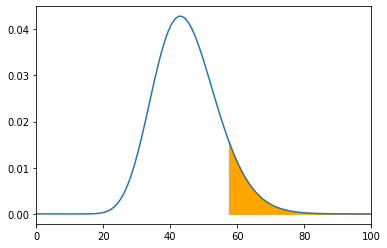

In [55]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='orange')

In [56]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [57]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


**Now it's clear that preference of specialization depend on the gender.**

<h3> Column Standardization - </h3> Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

**For numerical features -** We can do this using scale which comes under sklearn.preprocessing

In [58]:
standard_10percentage = preprocessing.scale(data['10percentage'])
print(standard_10percentage)

[ 0.64723345  0.75892071  0.71830716 ...  0.39949082  0.08067447
 -0.74378053]


In [59]:
standard_12percentage = preprocessing.scale(data['12percentage'])
print(standard_12percentage)

[ 1.93967569  0.95772873 -0.56974433 ... -0.81523107 -0.41699702
 -0.58792853]


<h3> Label Encoding - </h3> Label encoding is used to transform categorical data into numerical data.

**For categorical features -** If we have 2 categories than we can convert into binary. If we have more than 2 categories we can use dummy variables.

In [60]:
# For two values - 

encoding_gender = preprocessing.OneHotEncoder(sparse=False)
data['Gender'] = encoding_gender.fit_transform(data[['Gender']])

In [61]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,1.0,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,0.0,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,1.0,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,0.0,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,0.0,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [62]:
# For more than two values - 

encoding_degree = preprocessing.OrdinalEncoder()
data['Degree'] = encoding_degree.fit_transform(data[['Degree']])

In [63]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,1.0,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,0.0,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,0.0,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,0.0,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,1.0,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,0.0,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,0.0,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,0.0,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,0.0,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,0.0,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Thank you 😉😉😉